# 시계열 분석 실시

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import os


# 위안화만 시계역분석하기

In [2]:
df_raw = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/환율.csv',parse_dates=["APPL_DATE"],engine='python',encoding='euc-kr')
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


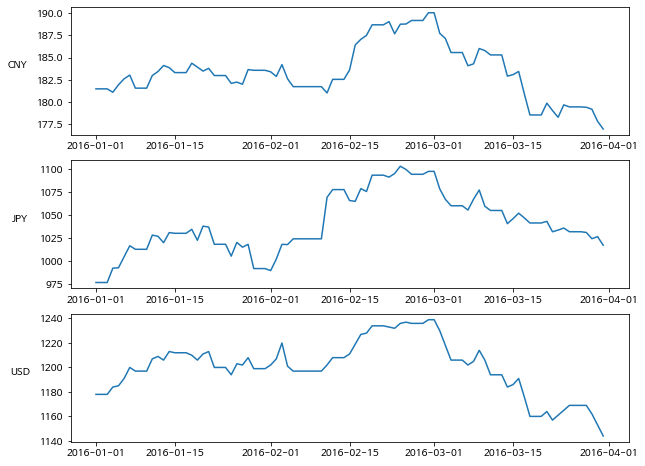

In [3]:
fig, (ax1,ax2,ax3) =plt.subplots(nrows=3, ncols=1, figsize = (10,8))
for (ax,idx,currency) in zip([ax1,ax2,ax3],[311,312,313],['CNY','JPY','USD']):
    ax.plot("APPL_DATE","STD_RATE",data = df_raw[df_raw['CURRENCY']==currency])
    ax.set_ylabel(currency, rotation=0, labelpad = 20)

In [12]:
df_CNY = df_raw[df_raw['CURRENCY']=='CNY'].set_index("APPL_DATE")
df_JPY = df_raw[df_raw['CURRENCY']=='JPY'].set_index("APPL_DATE")
df_USD = df_raw[df_raw['CURRENCY']=='USD'].set_index("APPL_DATE")

df_CNY.drop(["CURRENCY","USD_CONV_DATE"],axis=1, inplace=True)
df_JPY.drop(["CURRENCY","USD_CONV_DATE"],axis=1, inplace=True)
df_USD.drop(["CURRENCY","USD_CONV_DATE"],axis=1, inplace=True)
df_CNY



,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94
...,...
2016-03-27,179.45
2016-03-28,179.41
2016-03-29,179.18


# 여기서 부터 시작!

In [5]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx)/len_idx)<train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [6]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print(df_CNY_train.shape)
print(df_CNY_test.shape)

(82, 1)
(9, 1)


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


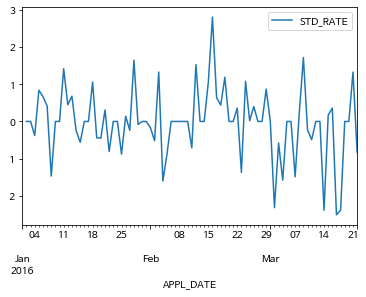

In [7]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

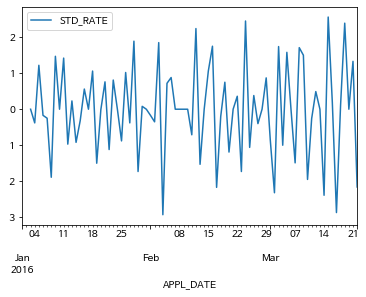

In [8]:
df_CNY_diff2= df_CNY_train - 2*(df_CNY_train.shift(1))+df_CNY_train.shift(2)
df_CNY_diff2.plot()

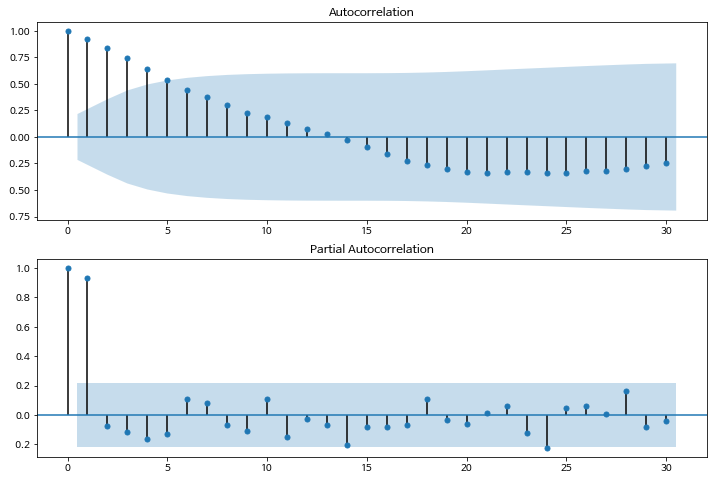

In [9]:
lag_size = 30
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags=lag_size,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_CNY_train['STD_RATE'], lags=lag_size,ax=ax2)

In [10]:
ts_model_cny = ARIMA(df_CNY_train,order=(1,2,0))

ts_result_cny = ts_model_cny.fit(trend='c', fulloutput=True)
print(ts_result_cny.summary())


                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Sun, 23 Feb 2020   AIC                            253.025
Time:                        18:20:05   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Timestamp('2016-03-23 00:00:00')

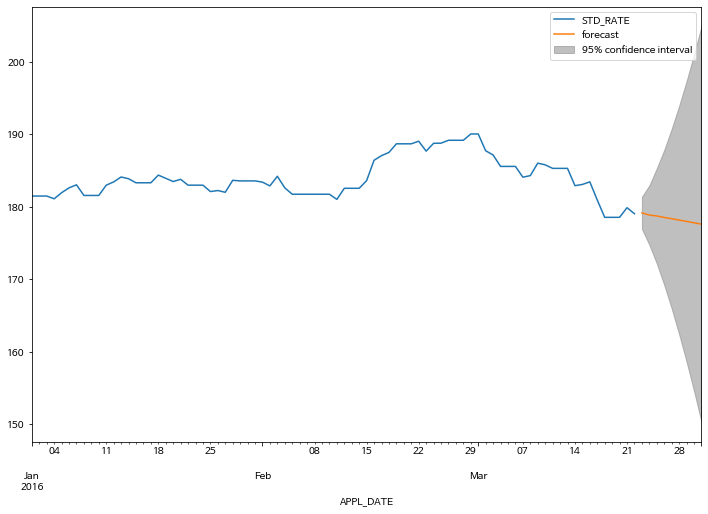

In [13]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig , ax = plt.subplots(figsize = (12,8))

ax= df_CNY_train.plot(ax=ax)
fig = ts_result_cny.plot_predict(start = start_time, end=end_time, ax=ax , plot_insample= False)
start_time


In [34]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start=start_time,end=end_time,typ = 'levels')
df_merge=df_CNY
df_merge["예측값"]=y_pred
df_merge.head()



,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.477844
2016-01-04,181.10,181.476898
2016-01-05,181.94,180.883667


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

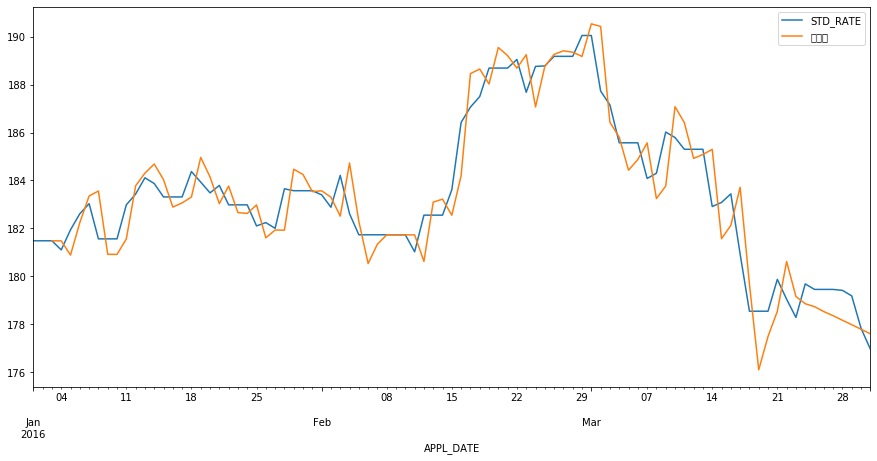

In [35]:
df_merge.plot(y=['STD_RATE',"예측값"],figsize=(15,7))



In [37]:
train_size = 0.9
len_idx = len(df_USD.index)
mask = (np.arange(len_idx)/len_idx)<train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [39]:
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]
# print(df_CNY_train.shape)
# print(df_CNY_test.shape)

(82, 1)
(9, 1)


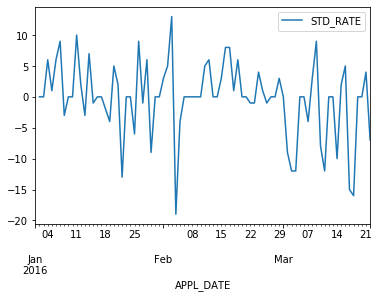

In [40]:
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

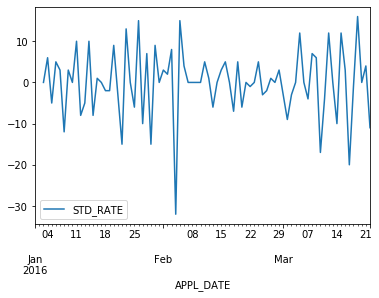

In [41]:
df_CNY_diff2= df_USD_train - 2*(df_USD_train.shift(1))+df_USD_train.shift(2)
df_CNY_diff2.plot()

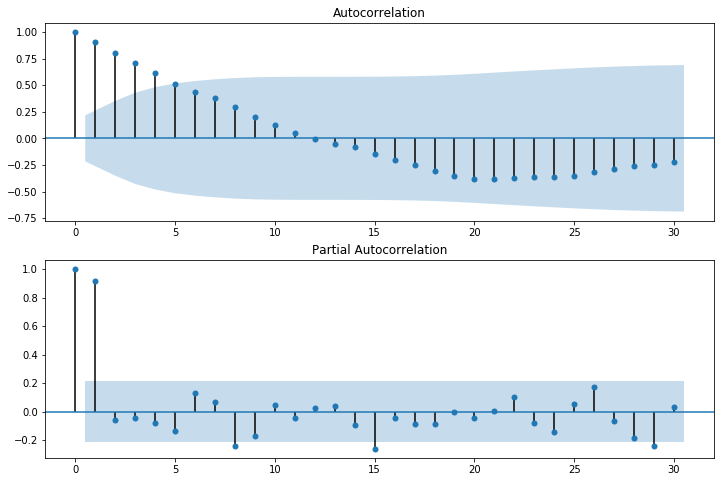

In [43]:
lag_size = 30
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_USD_train["STD_RATE"], lags=lag_size,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_USD_train['STD_RATE'], lags=lag_size,ax=ax2)

In [49]:

ts_model_usd = ARIMA(df_USD_train,order=(1,2,0))

ts_result_usd = ts_model_usd.fit(trend='c', fulloutput=True)
print(ts_result_usd.summary())


                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.800
Method:                       css-mle   S.D. of innovations              7.502
Date:                Fri, 07 Feb 2020   AIC                            555.601
Time:                        15:15:14   BIC                            562.747
Sample:                    01-03-2016   HQIC                           558.466
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0502      0.612     -0.082      0.935      -1.249       1.148
ar.L1.D2.STD_RATE    -0.3763      0.104     -3.622      0.001      -0.580      -0.173
                        

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


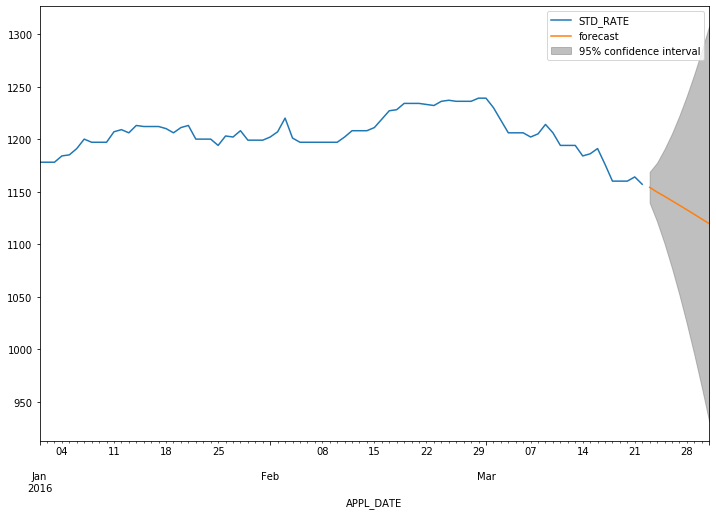

In [50]:

start_time = df_USD_test.index.min()
end_time = df_USD_test.index.max()
fig , ax = plt.subplots(figsize = (12,8))

ax= df_USD_train.plot(ax=ax)
fig = ts_result_cny.plot_predict(start = start_time, end=end_time, ax=ax , plot_insample= False)


,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1177.949753
2016-01-04,1184.0,1177.930843
2016-01-05,1185.0,1187.672879


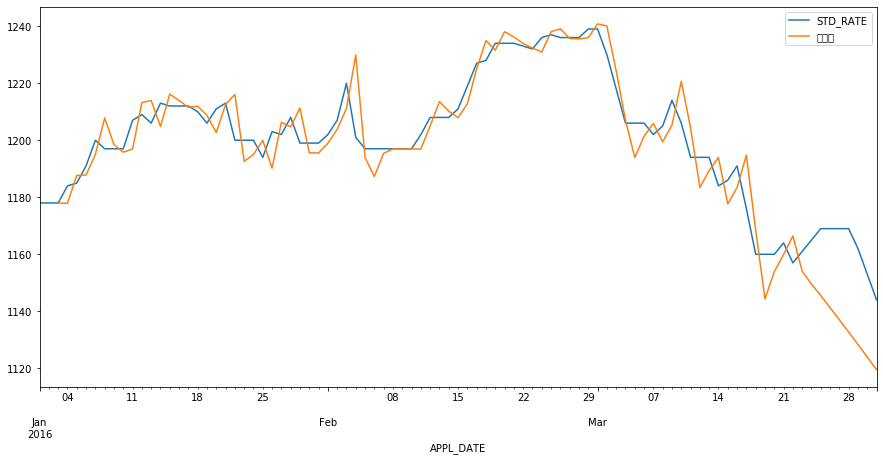

In [51]:
df_merge.plot(y=['STD_RATE',"예측값"],figsize=(15,7))

start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start=start_time,end=end_time,typ = 'levels')
df_merge=df_USD
df_merge["예측값"]=y_pred
df_merge.head()
